데이터 불러오기

In [110]:
import pandas as pd

ss_stock = pd.read_csv("D:/_data/stock predict/삼성전자.csv", thousands=',', encoding='CP949')
ku_stock = pd.read_csv("D:/_data/stock predict/키움증권.csv", thousands=',', encoding='CP949')

print(ss_stock.shape, ku_stock.shape)

(1120, 17) (1060, 17)


In [111]:
ss_stock = ss_stock.drop(range(893,1120), axis=0)
ss_stock

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,76800,78000,76800,78000,▲,200,0.26,11802494.0,914987.0,0.00,-733323,-907696,0,-257019,757837,51.78
1,2021/12/16,78500,78500,77400,77800,▲,200,0.26,11996128.0,934244.0,0.13,-442445,-261746,-105777,571543,822030,51.78
2,2021/12/15,76400,77600,76300,77600,▲,600,0.78,9584939.0,738592.0,0.14,-1118059,-654764,1095947,1946258,1706254,51.79
3,2021/12/14,76500,77200,76200,77000,▲,200,0.26,10976660.0,841447.0,0.14,198293,-1487295,1005909,804186,-132070,51.77
4,2021/12/13,77200,78300,76500,76800,▼,-100,-0.13,15038750.0,1163285.0,0.13,-181359,184966,-151301,-1388477,-606534,51.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2018/05/11,52000,52200,51200,51300,▼,-300,-0.58,10314997.0,533765.0,0.11,-45114,-495810,213378,-689886,847176,52.77
889,2018/05/10,51700,51700,50600,51600,▲,700,1.38,13905263.0,712206.0,0.11,454294,224160,-1013639,-864212,-721609,52.77
890,2018/05/09,52600,52800,50900,50900,▼,-1700,-3.23,16128305.0,831372.0,0.12,3312625,-1198028,-1598061,-2091271,-663462,52.78
891,2018/05/08,52600,53200,51900,52600,▲,700,1.35,23104720.0,1218273.0,0.13,-957475,-1049663,1451667,2726501,-1441124,52.81


In [112]:
ku_stock = ku_stock.drop(range(893,1060), axis=0)
ku_stock

,일자,시가,고가,저가,종가,전일비,Unnamed: 6,등락률,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
0,2021/12/17,107000,109500,106500,109500,▲,2000,1.86,60487,6576,0.00,-16202,6443,0,7348,8805,25.45
1,2021/12/16,109500,109500,107000,107500,,0,0.00,45031,4858,0.82,956,13405,-23661,-10182,-12948,25.45
2,2021/12/15,107000,108000,106500,107500,▲,500,0.47,23210,2496,0.81,-4089,1368,-915,5065,-1671,25.54
3,2021/12/14,106500,109000,106500,107000,▼,-500,-0.47,64977,6974,0.83,4777,-20135,15033,-1107,2477,25.54
4,2021/12/13,107000,109500,107000,107500,▲,1000,0.94,52503,5695,0.83,-13963,7746,7576,695,8305,25.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2018/05/11,122500,129500,121500,123000,▲,3000,2.50,205885,25797,0.32,-5731,17000,-15068,22364,42506,19.21
889,2018/05/10,119000,122500,118500,120000,▲,4000,3.45,160660,19348,0.30,-11827,50258,-37975,15167,34692,19.28
890,2018/05/09,118000,120000,114000,116000,▼,-2000,-1.69,151419,17576,0.29,16826,-32266,15686,7141,9642,19.45
891,2018/05/08,124000,125000,118000,118000,▼,-4000,-3.28,124369,15226,0.34,7779,31463,-39014,-3018,-17439,19.38


데이터 전처리

In [113]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# 삼성증권 데이터 전처리

x1 = ss_stock.drop(columns=['일자', '종가', '전일비', '거래량', 'Unnamed: 6', '등락률', '금액(백만)', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis=1)
y1 = ss_stock['종가']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=1)
x1_test, x1_val, y1_test, y1_val = train_test_split(x1_test, y1_test, test_size=0.7, random_state=1)

x1.shape, y1.shape

((893, 4), (893,))

In [115]:
# 키움증권 데이터 전처리

x2 = ku_stock.drop(columns=['일자', '종가', '전일비', '거래량', 'Unnamed: 6', '등락률', '금액(백만)', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비'], axis=1)
y2 = ku_stock['종가']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, random_state=1)
x2_test, x2_val, y2_test, y2_val = train_test_split(x2_test, y2_test, test_size=0.7, random_state=1)

x2.shape, y2.shape

((893, 4), (893,))

모델 구성

In [116]:
#삼성 input
input1 = Input(shape=(4,))
dense1_1 = Dense(5, activation='relu')(input1)
dense1_2 = Dense(7, activation='relu')(dense1_1)
dense1_3 = Dense(7, activation='relu')(dense1_2)
output1 = Dense(7, activation='relu')(dense1_3)

#키움 input
input2 = Input(shape=(4,))
dense2_1 = Dense(10, activation='relu')(input2)
dense2_2 = Dense(10, activation='relu')(dense2_1)
dense2_3 = Dense(10, activation='relu')(dense2_2)
dense2_4 = Dense(10, activation='relu')(dense2_3)
output2 = Dense(10, activation='relu')(dense2_4)

#앙상블
from tensorflow.keras.layers import Concatenate, concatenate
merge1 = concatenate([output1, output2])

#삼성 out
output1_1 = Dense(7, activation='relu')(merge1)
output1_2 = Dense(11)(output1_1)
output1_3 = Dense(11)(output1_2)
ss_output1 = Dense(1)(output1_3)

#키움 out
output2_1 = Dense(7, activation='relu')(merge1)
output2_2 = Dense(21)(output2_1)
output2_3 = Dense(21)(output2_2)
output2_4 = Dense(21)(output2_3)
ku_output2 = Dense(1)(output2_4)

model = Model(inputs=[input1, input2], outputs=[ss_output1, ku_output2])

In [75]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_112 (Dense)               (None, 10)           50          input_14[0][0]                   
__________________________________________________________________________________________________
dense_108 (Dense)               (None, 5)            25          input_13[0][0]                   
____________________________________________________________________________________________

컴파일 & 훈련

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='loss', patience=20, mode='min', verbose=1, restore_best_weights=True)
hist = model.fit([x1_train, x2_train], [y1_train, y2_train], epochs=1000, batch_size=16, 
                 validation_data=([x1_val, x2_val], [y1_val, y2_val]), callbacks=[es])

Epoch 1/1000
45/45 [==============================] - 1s 4ms/step - loss: 11089649.0000 - dense_120_loss: 8914907.0000 - dense_125_loss: 2174742.5000 - val_loss: 6212978.0000 - val_dense_120_loss: 5372193.0000 - val_dense_125_loss: 840784.1875
Epoch 2/1000
45/45 [==============================] - 0s 1ms/step - loss: 56701084.0000 - dense_120_loss: 55122036.0000 - dense_125_loss: 1579031.1250 - val_loss: 7993856.0000 - val_dense_120_loss: 7150626.0000 - val_dense_125_loss: 843229.8125
Epoch 3/1000
45/45 [==============================] - 0s 1ms/step - loss: 38181996.0000 - dense_120_loss: 36519416.0000 - dense_125_loss: 1662575.5000 - val_loss: 6998429.0000 - val_dense_120_loss: 5493847.0000 - val_dense_125_loss: 1504581.7500
Epoch 4/1000
45/45 [==============================] - 0s 1ms/step - loss: 15536287.0000 - dense_120_loss: 12981666.0000 - dense_125_loss: 2554621.5000 - val_loss: 9862175.0000 - val_dense_120_loss: 9007974.0000 - val_dense_125_loss: 854201.9375
Epoch 5/1000
45/45 [

데이터 시각화

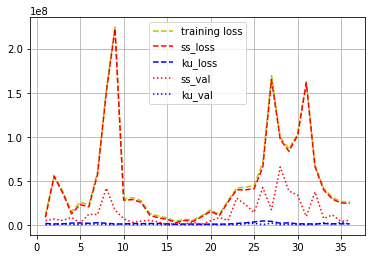

In [85]:
loss = hist.history["loss"]
ss_loss = hist.history["dense_120_loss"]
ku_loss = hist.history["dense_125_loss"]
ss_val = hist.history["val_dense_120_loss"]
ku_val = hist.history["val_dense_125_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'y--', label="training loss")
plt.plot(epochs, ss_loss, 'r--', label="ss_loss")
plt.plot(epochs, ku_loss, 'b--', label="ku_loss")
plt.plot(epochs, ss_val, 'r:', label="ss_val")
plt.plot(epochs, ku_val, 'b:', label="ku_val")

plt.grid()
plt.legend()
plt.show()